# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [132]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

In [133]:
# Solución propuesta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('accidents-1.csv',delimiter=';')
#df.head(5)

#Porcentaje de datos nullos por columna
null_percentage = df.isnull().mean() * 100
print(null_percentage)

DATE                              0.000000
TIME                              0.000000
BOROUGH                           0.000000
ZIP CODE                          0.029347
LATITUDE                          2.925516
LONGITUDE                         2.925516
ON STREET NAME                   35.470103
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.370616
CONTRIBUTING FACTOR VEHICLE 2    16.773296
CONTRIBUTING FACTOR VEHICLE 3    94.519583
CONTRIBUTING FACTOR VEHICLE 4    98.802626
CONTRIBUTING FACTOR VEHICLE 5    99.667955
COLLISION_ID                      0.000000
VEHICLE TYPE CODE 1               0.721527
VEHICLE TYPE CODE 2              23.306026
VEHICLE TYPE CODE 3              94.842824
VEHICLE TYPE CODE 4              98.861321
VEHICLE TYP

In [134]:
df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [135]:

df_cleaned = df.copy()

#imputacion por moda para zip code
zip_mode_per_location = df_cleaned.groupby('BOROUGH')['ZIP CODE'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
df_cleaned['ZIP CODE'] = df_cleaned['ZIP CODE'].fillna(df_cleaned['BOROUGH'].map(zip_mode_per_location))

# calculo de medias por municipio
lat_mean_per_borough = df_cleaned.groupby('BOROUGH')['LATITUDE'].mean()
lon_mean_per_borough = df_cleaned.groupby('BOROUGH')['LONGITUDE'].mean()

# Mapeo de medias para latitude y longitude
df_cleaned['LATITUDE'] = df_cleaned['LATITUDE'].fillna(df_cleaned['BOROUGH'].map(lat_mean_per_borough))
df_cleaned['LONGITUDE'] = df_cleaned['LONGITUDE'].fillna(df_cleaned['BOROUGH'].map(lon_mean_per_borough))

df_cleaned['ON STREET NAME'].fillna('UNKNOWN', inplace=True)

df_cleaned[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']] = df[['VEHICLE TYPE CODE 1'
        , 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']].fillna('Unknown')

df_cleaned[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
            'CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']] = df_cleaned[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']].fillna('Unspecified')

null_percentage_after = df_cleaned.isnull().mean() * 100
print(null_percentage_after)

C:\Users\maria\AppData\Local\Temp\ipykernel_20380\1416708536.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['ON STREET NAME'].fillna('UNKNOWN', inplace=True)


DATE                             0.0
TIME                             0.0
BOROUGH                          0.0
ZIP CODE                         0.0
LATITUDE                         0.0
LONGITUDE                        0.0
ON STREET NAME                   0.0
NUMBER OF PEDESTRIANS INJURED    0.0
NUMBER OF PEDESTRIANS KILLED     0.0
NUMBER OF CYCLIST INJURED        0.0
NUMBER OF CYCLIST KILLED         0.0
NUMBER OF MOTORIST INJURED       0.0
NUMBER OF MOTORIST KILLED        0.0
CONTRIBUTING FACTOR VEHICLE 1    0.0
CONTRIBUTING FACTOR VEHICLE 2    0.0
CONTRIBUTING FACTOR VEHICLE 3    0.0
CONTRIBUTING FACTOR VEHICLE 4    0.0
CONTRIBUTING FACTOR VEHICLE 5    0.0
COLLISION_ID                     0.0
VEHICLE TYPE CODE 1              0.0
VEHICLE TYPE CODE 2              0.0
VEHICLE TYPE CODE 3              0.0
VEHICLE TYPE CODE 4              0.0
VEHICLE TYPE CODE 5              0.0
dtype: float64


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [x] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [x] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [x] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


C:\Users\maria\AppData\Local\Temp\ipykernel_20380\782509379.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  accidentes_tiempo = df_cleaned.groupby(pd.Grouper(key='DATE', freq='M')).agg({'COLLISION_ID': 'count'}).reset_index()


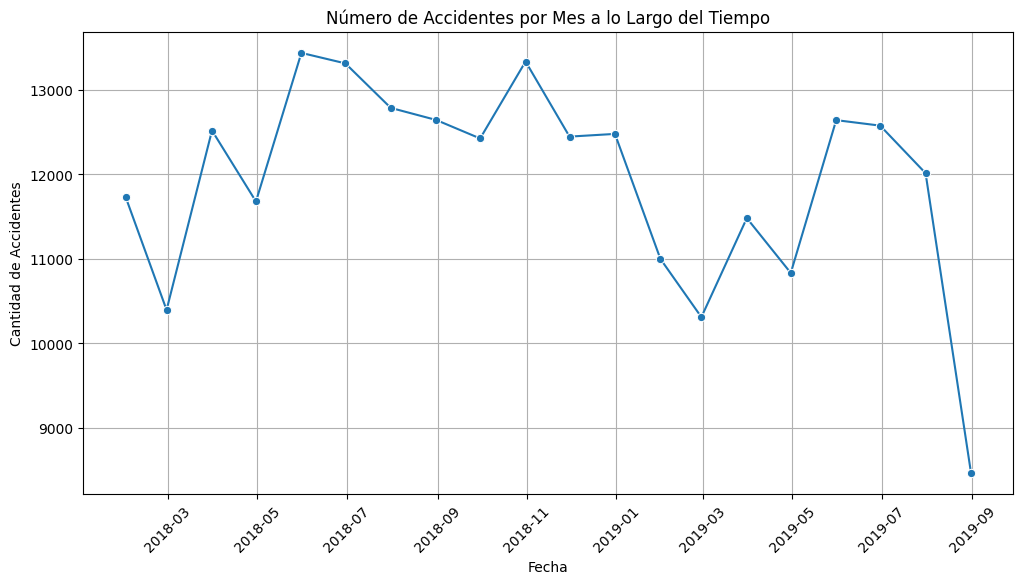

In [136]:
# Solución propuesta

df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'], format='%m/%d/%Y')
accidentes_tiempo = df_cleaned.groupby(pd.Grouper(key='DATE', freq='M')).agg({'COLLISION_ID': 'count'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=accidentes_tiempo, x='DATE', y='COLLISION_ID', marker='o')

plt.title('Número de Accidentes por Mes a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

C:\Users\maria\AppData\Local\Temp\ipykernel_20380\695113669.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['TIME'] = pd.to_datetime(df_cleaned['TIME'])


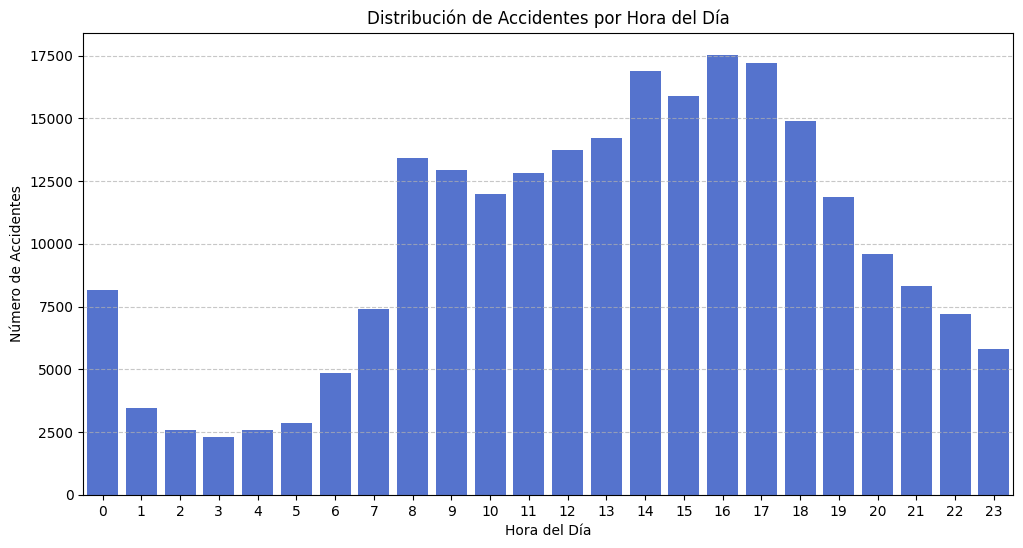

In [137]:
# Solución propuesta
#convertir la columna TIME a datetime si no lo está
df_cleaned['TIME'] = pd.to_datetime(df_cleaned['TIME'])
df_cleaned['HOUR'] = df_cleaned['TIME'].dt.hour

#conteo
accidentes_por_hora = df_cleaned.groupby('HOUR')['COLLISION_ID'].count().reset_index()

#grafico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=accidentes_por_hora, x='HOUR', y='COLLISION_ID', color='royalblue')

plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks(range(0, 24))  #asegurar que se muestren todas las horas de 0 a 23
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

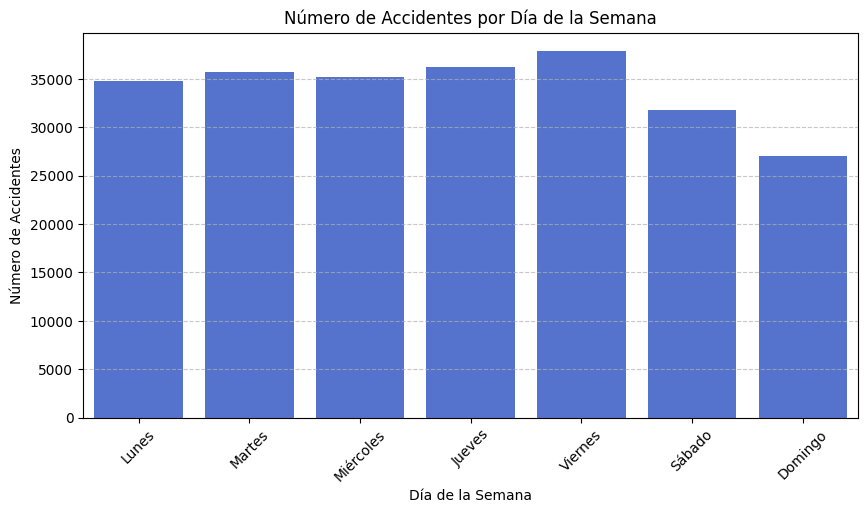

In [138]:
# Solución propuesta

#sacar dia
df_cleaned['WEEKDAY'] = df_cleaned['DATE'].dt.weekday

#diccionario para nombrar
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}

#conteo
accidentes_por_dia = df_cleaned.groupby('WEEKDAY')['COLLISION_ID'].count().reset_index()
accidentes_por_dia['WEEKDAY'] = accidentes_por_dia['WEEKDAY'].map(dias_semana)

#ordenar
accidentes_por_dia = accidentes_por_dia.set_index('WEEKDAY').reindex(dias_semana.values()).reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(data=accidentes_por_dia, x='WEEKDAY', y='COLLISION_ID', color='royalblue')

plt.title('Número de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

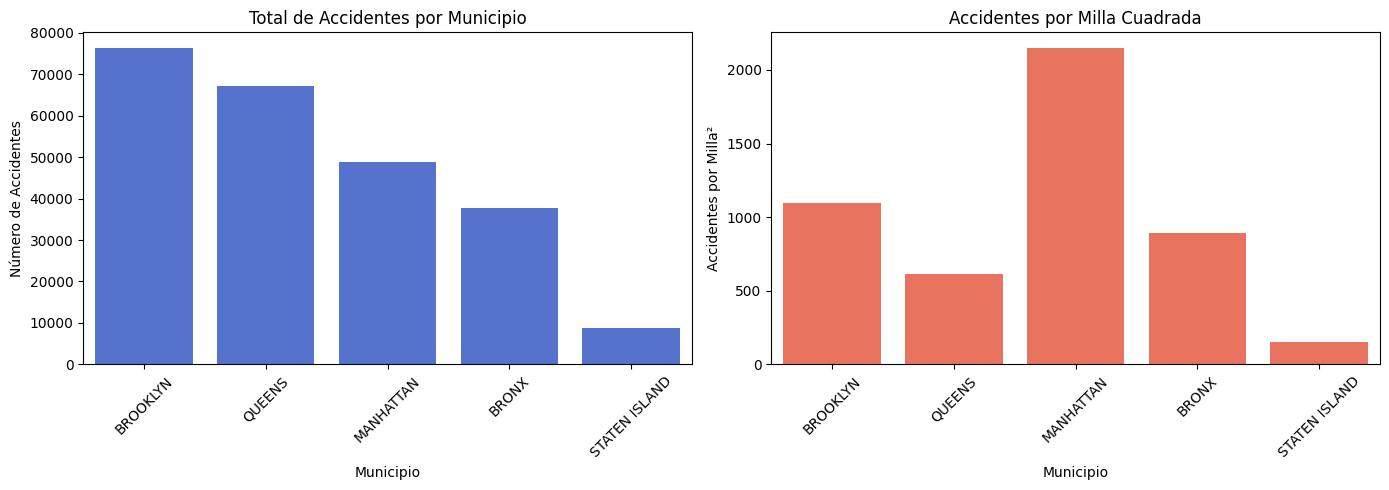

In [139]:
#Solucion propuesta

borough_area = {
    "MANHATTAN": 22.7,
    "BROOKLYN": 69.4,
    "QUEENS": 108.7,
    "BRONX": 42.2,
    "STATEN ISLAND": 57.5
}

#contar accidentes por municipio
accidentes_por_municipio = df_cleaned.groupby('BOROUGH')['COLLISION_ID'].count().reset_index()
accidentes_por_municipio = accidentes_por_municipio.sort_values(by='COLLISION_ID', ascending=False)

#calcular accidentes por milla cuadrada
accidentes_por_municipio['ACCIDENTES_POR_MILLA2'] = accidentes_por_municipio['BOROUGH'].map(borough_area)
accidentes_por_municipio['ACCIDENTES_POR_MILLA2'] = accidentes_por_municipio['COLLISION_ID'] / accidentes_por_municipio['ACCIDENTES_POR_MILLA2']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


#accidentes por municipio
sns.barplot(data=accidentes_por_municipio, x='BOROUGH', y='COLLISION_ID', color='royalblue', ax=axes[0])
axes[0].set_title('Total de Accidentes por Municipio')
axes[0].set_xlabel('Municipio')
axes[0].set_ylabel('Número de Accidentes')
axes[0].tick_params(axis='x', rotation=45)

#accidentes por milla
sns.barplot(data=accidentes_por_municipio, x='BOROUGH', y='ACCIDENTES_POR_MILLA2', color='tomato', ax=axes[1])
axes[1].set_title('Accidentes por Milla Cuadrada')
axes[1].set_xlabel('Municipio')
axes[1].set_ylabel('Accidentes por Milla²')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

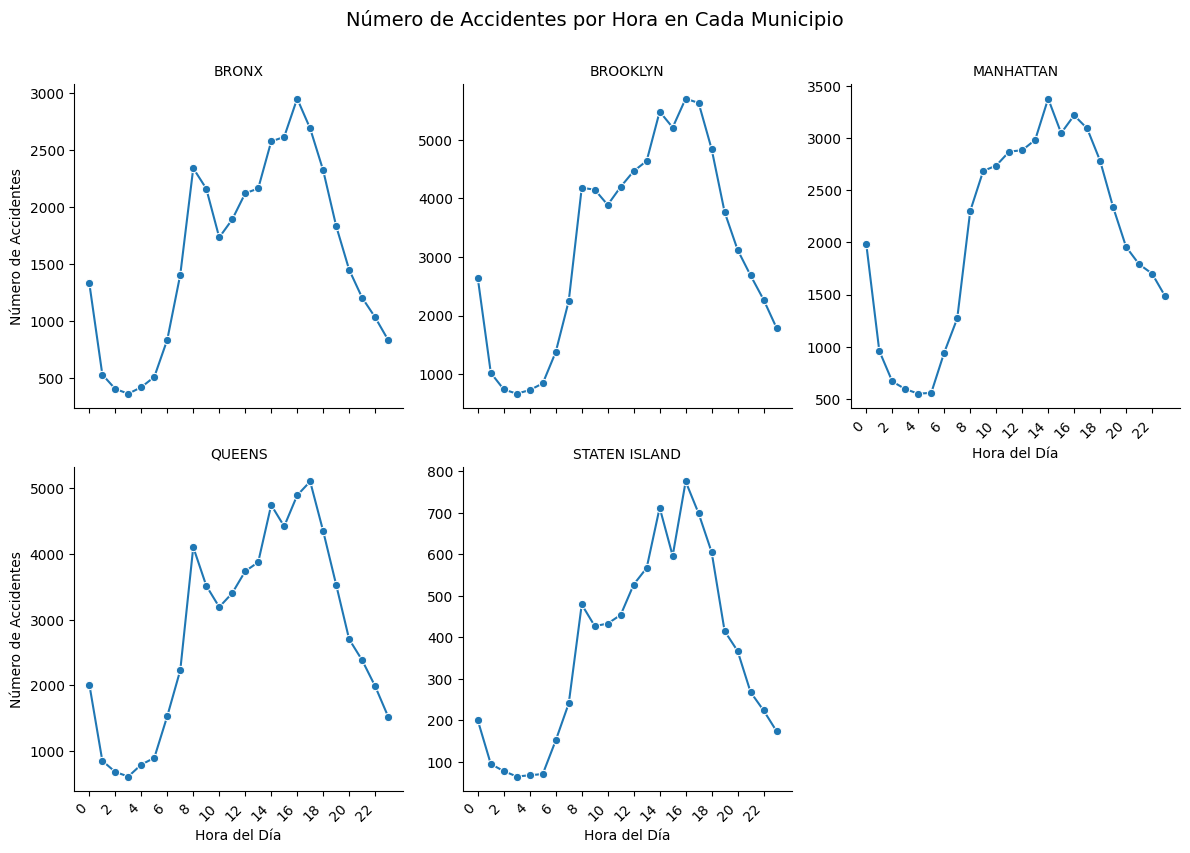

In [140]:
# Solución propuesta

#agrupar la data
accidentes_por_hora = df_cleaned.groupby(['BOROUGH', 'HOUR'])['COLLISION_ID'].count().reset_index()

#crear facegrid
g = sns.FacetGrid(accidentes_por_hora, col='BOROUGH', col_wrap=3, height=4, sharey=False)

g.map(sns.lineplot, 'HOUR', 'COLLISION_ID', marker='o')

g.set_titles("{col_name}")
g.set_axis_labels("Hora del Día", "Número de Accidentes")

for ax in g.axes.flat:
    ax.set_xticks(range(0, 24, 2))  
    ax.set_xticklabels(range(0, 24, 2), rotation=45, ha='right')  


plt.suptitle("Número de Accidentes por Hora en Cada Municipio", fontsize=14, y=1.05)
plt.show()


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

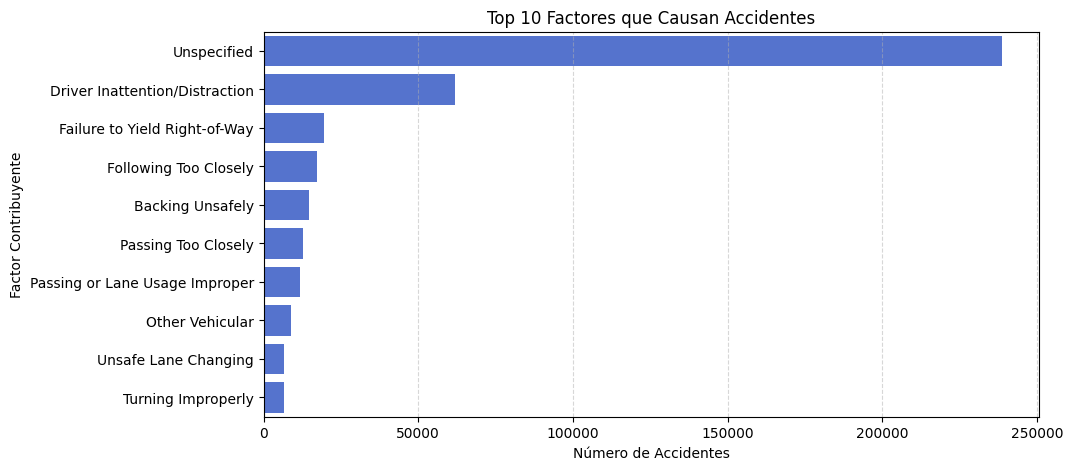

In [141]:

factor_cols = [
    "CONTRIBUTING FACTOR VEHICLE 1",
    "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3",
    "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5"
]

factores = df_cleaned.melt(id_vars=['COLLISION_ID'], value_vars=factor_cols, var_name="FACTOR_TYPE", value_name="FACTOR")

#eliminar nulos
factores = factores.dropna(subset=['FACTOR'])
factores = factores.drop_duplicates(subset=['COLLISION_ID', 'FACTOR'])

factores_count = factores['FACTOR'].value_counts().reset_index()
factores_count.columns = ['FACTOR', 'COUNT']

top_factores = factores_count.head(10)

#graficar
plt.figure(figsize=(10, 5))
sns.barplot(data=top_factores, x='COUNT', y='FACTOR', color='royalblue')
plt.xlabel('Número de Accidentes')
plt.ylabel('Factor Contribuyente')
plt.title('Top 10 Factores que Causan Accidentes')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

C:\Users\maria\AppData\Local\Temp\ipykernel_20380\51991743.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_vehicles = vehicles_count.groupby("BOROUGH").apply(lambda x: x.nlargest(5, 'COUNT')).reset_index(drop=True)


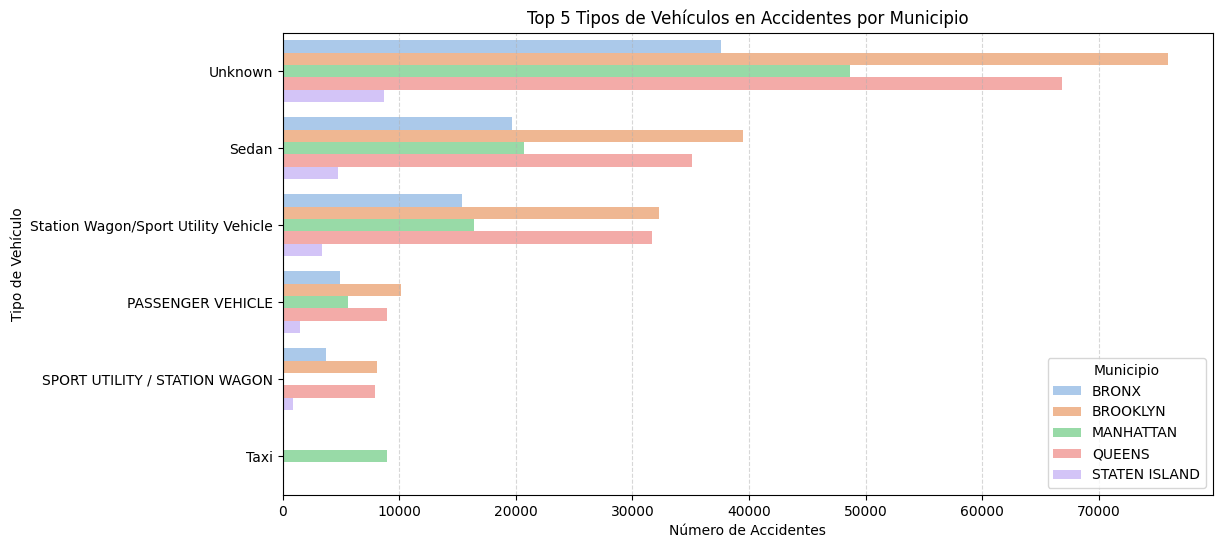

In [96]:
# Solución propuesta


#mismo proceso de arriba

vehicle_cols = [
    "VEHICLE TYPE CODE 1",
    "VEHICLE TYPE CODE 2",
    "VEHICLE TYPE CODE 3",
    "VEHICLE TYPE CODE 4",
    "VEHICLE TYPE CODE 5"
]

#un solo df
vehicles = df_cleaned.melt(id_vars=['COLLISION_ID', 'BOROUGH'], value_vars=vehicle_cols, var_name="VEHICLE_COLUMN", value_name="VEHICLE_TYPE")

#quito nulos y duplicadps
vehicles = vehicles.dropna(subset=['VEHICLE_TYPE'])
vehicles = vehicles.drop_duplicates(subset=['COLLISION_ID', 'VEHICLE_TYPE'])

#contar tipos de veh por municipio
vehicles_count = vehicles.groupby(['BOROUGH', 'VEHICLE_TYPE']).size().reset_index(name='COUNT')

#mas comunes por municipio usando nlargest
top_vehicles = vehicles_count.groupby("BOROUGH").apply(lambda x: x.nlargest(5, 'COUNT')).reset_index(drop=True)

#grafica
plt.figure(figsize=(12, 6))
sns.barplot(data=top_vehicles, x='COUNT', y='VEHICLE_TYPE', hue='BOROUGH', dodge=True, palette="pastel")
plt.xlabel('Número de Accidentes')
plt.ylabel('Tipo de Vehículo')
plt.title('Top 5 Tipos de Vehículos en Accidentes por Municipio')
plt.legend(title='Municipio')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [x] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [x] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [97]:
# Solución propuesta


### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

C:\Users\maria\AppData\Local\Temp\ipykernel_20380\3379271311.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_FATALITIES', y='VEHICLE', data=top_5_vehicles, palette='Blues_r')


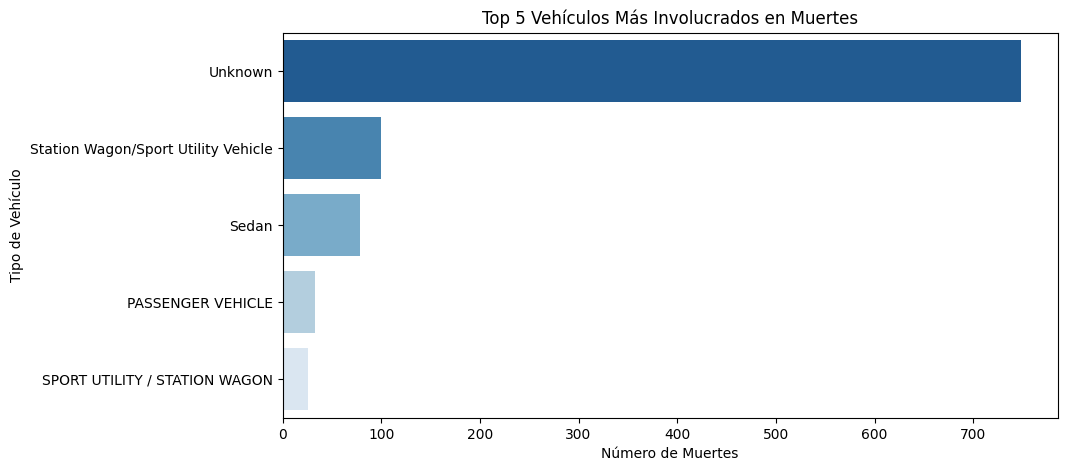

In [ ]:
# Solución propuesta

df_cleaned['TOTAL_FATALITIES'] = (
    df_cleaned['NUMBER OF PEDESTRIANS KILLED'] +
    df_cleaned['NUMBER OF CYCLIST KILLED'] +
    df_cleaned['NUMBER OF MOTORIST KILLED']
)


#vehiculos vs numero de muertes
vehicles_fatalities = pd.concat([
    df_cleaned[['TOTAL_FATALITIES', col]].rename(columns={col: 'VEHICLE'}) 
    for col in vehicle_cols
]).dropna()

#agrupar y sumar muertes
vehicle_deaths = vehicles_fatalities.groupby('VEHICLE')['TOTAL_FATALITIES'].sum().reset_index()

vehicle_deaths['FATALITIES_PROPORTION'] = vehicle_deaths['TOTAL_FATALITIES']/vehicle_deaths['TOTAL_FATALITIES'].sum()

#ordenar
top_5_vehicles = vehicle_deaths.sort_values(by='TOTAL_FATALITIES', ascending=False).head(5)

#grafico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='TOTAL_FATALITIES', y='VEHICLE', data=top_5_vehicles, palette='Blues_r')

plt.xlabel("Número de Muertes")
plt.ylabel("Tipo de Vehículo")
plt.title("Top 5 Vehículos Más Involucrados en Muertes")

plt.show()
